In [1]:
# Vibrações na corda

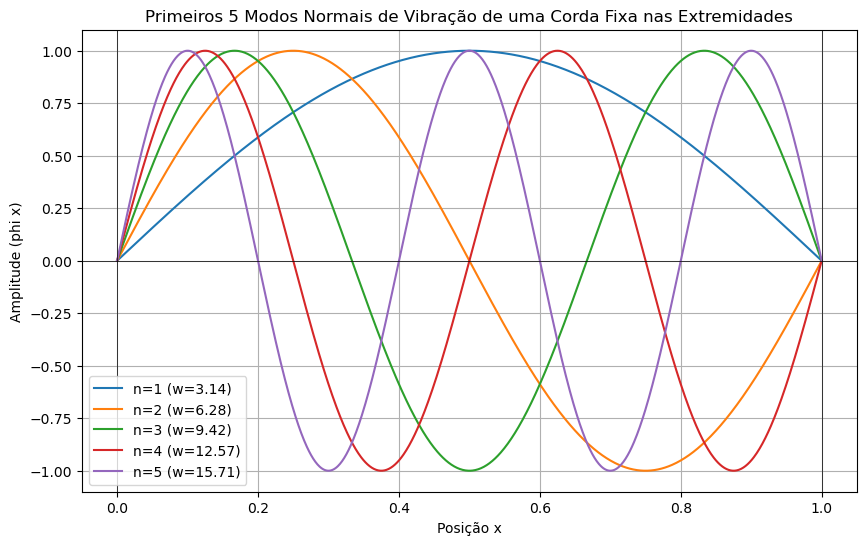

In [2]:
#3a. Considere o ansatz:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros físicos
L = 1.0  # Comprimento da corda
c = 1.0  # Velocidade da onda
n_modes = 5  # Número de modos normais a plotar

# Função para calcular os modos normais
def normal_mode(x, n, L):
    """Retorna o n-ésimo modo normal em posição x"""
    return np.sin(n * np.pi * x / L)

# Criar um grid de pontos ao longo da corda
x = np.linspace(0, L, 1000)

# Configurar a figura
plt.figure(figsize=(10, 6))
plt.title(f'Primeiros {n_modes} Modos Normais de Vibração de uma Corda Fixa nas Extremidades')
plt.xlabel('Posição x')
plt.ylabel('Amplitude (phi x)')
plt.grid(True)

# Plotar cada modo normal
for n in range(1, n_modes + 1):
    # Calcular a frequência angular
    omega_n = n * np.pi * c / L
    # Calcular o modo normal
    phi = normal_mode(x, n, L)
    # Plotar
    plt.plot(x, phi, label=f'n={n} (w={omega_n:.2f})')

# Adicionar legendas e mostrar
plt.legend()
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.axvline(L, color='black', linewidth=0.5)
plt.show()

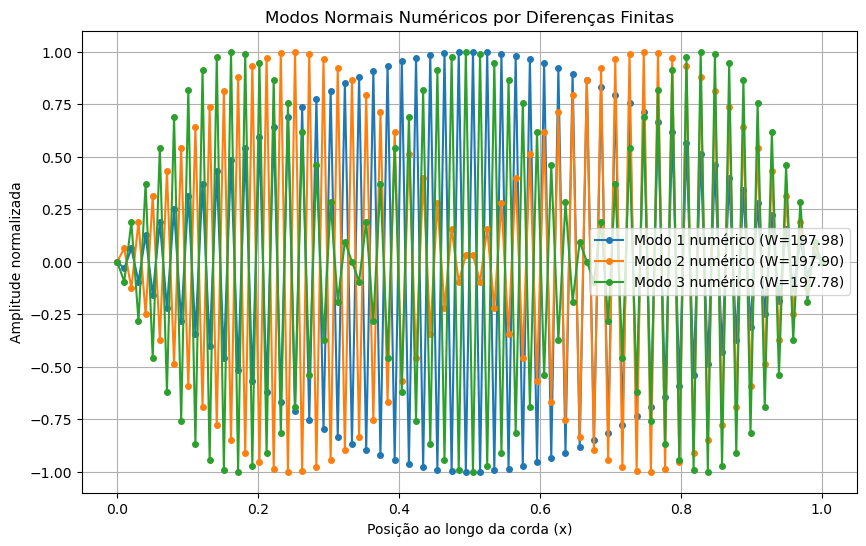

In [3]:
#3b:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

def finite_difference_solution(L, c, N=100, num_modes=3):
    """
    Resolve o problema de vibração em corda usando diferenças finitas.

    Parâmetros:
        L: comprimento da corda
        c: velocidade da onda
        N: número de pontos de discretização
        num_modes: número de modos a serem plotados
    """
    dx = L / (N - 1)  # Espaçamento entre pontos
    x = np.linspace(0, L, N)

    # Construir a matriz tridiagonal do operador segunda derivada
    main_diag = -2 * np.ones(N)
    off_diag = np.ones(N - 1)
    A = (np.diag(main_diag) + np.diag(off_diag, 1) + np.diag(off_diag, -1)) / (dx**2)

    # Aplicar condições de contorno (remover primeira e última linha/coluna)
    A = A[1:-1, 1:-1]

    # Resolver o problema de autovalores
    eigenvalues, eigenvectors = eigh(A)

    # Calcular frequências angulares: ω = c√(-λ)
    omega_numerical = c * np.sqrt(-eigenvalues)

    # Adicionar zeros nas extremidades aos autovetores
    full_eigenvectors = np.zeros((N, len(eigenvalues)))
    full_eigenvectors[1:-1, :] = eigenvectors

    # Plotar os primeiros modos
    plt.figure(figsize=(10, 6))
    for i in range(num_modes):
        mode = i + 1
        phi = full_eigenvectors[:, i]
        omega = omega_numerical[i]

        # Normalizar para plotagem
        phi = phi / np.max(np.abs(phi))

        plt.plot(x, phi, 'o-', markersize=4,
                label=f'Modo {mode} numérico (W={omega:.2f})')

    plt.title('Modos Normais Numéricos por Diferenças Finitas')
    plt.xlabel('Posição ao longo da corda (x)')
    plt.ylabel('Amplitude normalizada')
    plt.legend()
    plt.grid(True)
    plt.show()

    return omega_numerical, full_eigenvectors, x

# Resolver e plotar os primeiros 3 modos
omega_num, eigenvectors, x_num = finite_difference_solution(L, c)


Comparação entre autovalores analíticos e numéricos:
Modo | lambda analítico | lambda numérico  | Erro lambda (%) | w analítico | w numérico  | Erro w (%)
----------------------------------------------------------------------------------------
   1 |    -9.8696 |    -9.8688 |    0.01% |     3.1416 |     3.1415 |    0.00%
   2 |   -39.4784 |   -39.4652 |    0.03% |     6.2832 |     6.2821 |    0.02%
   3 |   -88.8264 |   -88.7594 |    0.08% |     9.4248 |     9.4212 |    0.04%
   4 |  -157.9137 |  -157.7018 |    0.13% |    12.5664 |    12.5579 |    0.07%
   5 |  -246.7401 |  -246.2229 |    0.21% |    15.7080 |    15.6915 |    0.10%
   6 |  -355.3058 |  -354.2337 |    0.30% |    18.8496 |    18.8211 |    0.15%
   7 |  -483.6106 |  -481.6253 |    0.41% |    21.9911 |    21.9460 |    0.21%
   8 |  -631.6547 |  -628.2696 |    0.54% |    25.1327 |    25.0653 |    0.27%
   9 |  -799.4380 |  -794.0187 |    0.68% |    28.2743 |    28.1783 |    0.34%
  10 |  -986.9604 |  -978.7060 |    0.84% |  

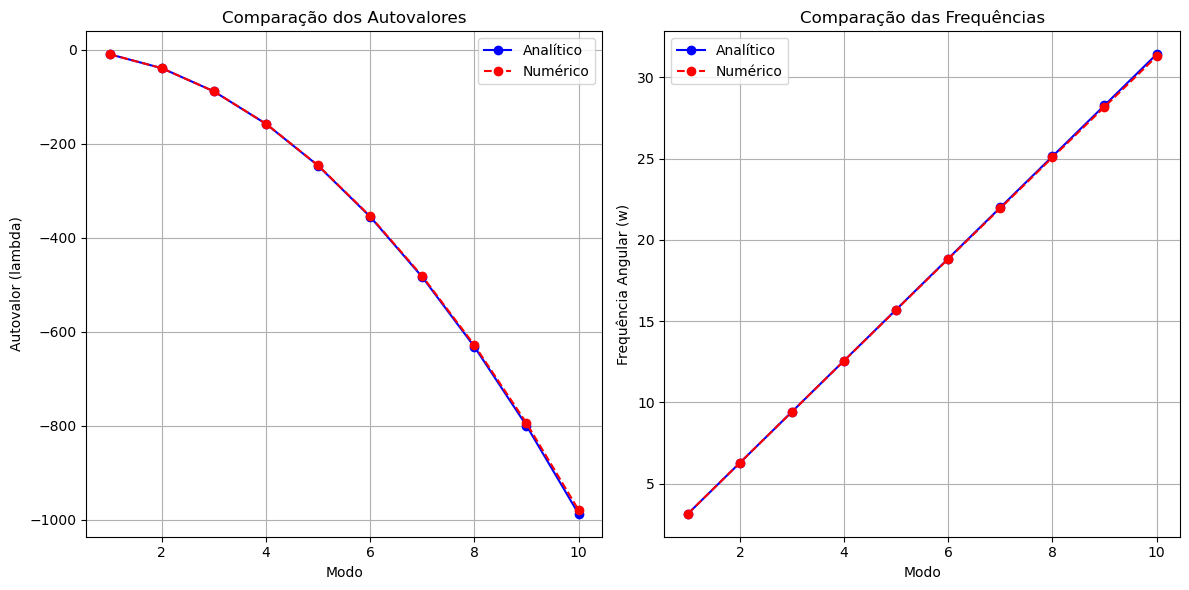

In [4]:
#3c. 
import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt

# Parâmetros físicos
L = 1.0  # Comprimento da corda
c = 1.0  # Velocidade da onda
N = 100  # Número de pontos na discretização

# Função para calcular a solução analítica
def analytical_eigenvalues(L, c, num_modes):
    """Calcula os autovalores analíticos para os primeiros num_modes modos."""
    modes = np.arange(1, num_modes + 1)
    k = modes * np.pi / L  # Números de onda
    omega_analytical = c * k  # Frequências angulares
    lambda_analytical = -(omega_analytical / c)**2  # Autovalores (λ = -(ω/c)² = -k²)
    return lambda_analytical, omega_analytical

# Função para calcular a solução numérica
def numerical_eigenvalues(L, c, N):
    """Calcula os autovalores numéricos usando diferenças finitas."""
    dx = L / (N - 1)
    x = np.linspace(0, L, N)

    # Construir a matriz tridiagonal
    main_diag = -2 * np.ones(N)
    off_diag = np.ones(N - 1)
    A = (np.diag(main_diag) + np.diag(off_diag, 1) + np.diag(off_diag, -1)) / (dx**2)

    # Aplicar condições de contorno
    A = A[1:-1, 1:-1]

    # Calcular autovalores e autovetores
    lambda_numerical, eigenvectors = eigh(A)

    # Ordenar do menor para o maior (em valor absoluto)
    idx = np.argsort(np.abs(lambda_numerical))
    lambda_numerical = lambda_numerical[idx]

    # Calcular frequências numéricas
    omega_numerical = c * np.sqrt(-lambda_numerical)

    return lambda_numerical, omega_numerical

# Calcular autovalores analíticos e numéricos
num_modes = 10
lambda_analytical, omega_analytical = analytical_eigenvalues(L, c, num_modes)
lambda_numerical, omega_numerical = numerical_eigenvalues(L, c, N)

# Pegar apenas os primeiros num_modes autovalores numéricos
lambda_numerical = lambda_numerical[:num_modes]
omega_numerical = omega_numerical[:num_modes]

# Calcular erros relativos
lambda_error = 100 * np.abs((lambda_numerical - lambda_analytical) / lambda_analytical)
omega_error = 100 * np.abs((omega_numerical - omega_analytical) / omega_analytical)

# Criar tabela de comparação
print("Comparação entre autovalores analíticos e numéricos:")
print("Modo | lambda analítico | lambda numérico  | Erro lambda (%) | w analítico | w numérico  | Erro w (%)")
print("----------------------------------------------------------------------------------------")
for i in range(num_modes):
    print(f"{i+1:4d} | {lambda_analytical[i]:10.4f} | {lambda_numerical[i]:10.4f} | {lambda_error[i]:7.2f}% | "
          f"{omega_analytical[i]:10.4f} | {omega_numerical[i]:10.4f} | {omega_error[i]:7.2f}%")

# Plotar comparação
modes = np.arange(1, num_modes + 1)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(modes, lambda_analytical, 'bo-', label='Analítico')
plt.plot(modes, lambda_numerical, 'ro--', label='Numérico')
plt.xlabel('Modo')
plt.ylabel('Autovalor (lambda)')
plt.title('Comparação dos Autovalores')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(modes, omega_analytical, 'bo-', label='Analítico')
plt.plot(modes, omega_numerical, 'ro--', label='Numérico')
plt.xlabel('Modo')
plt.ylabel('Frequência Angular (w)')
plt.title('Comparação das Frequências')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

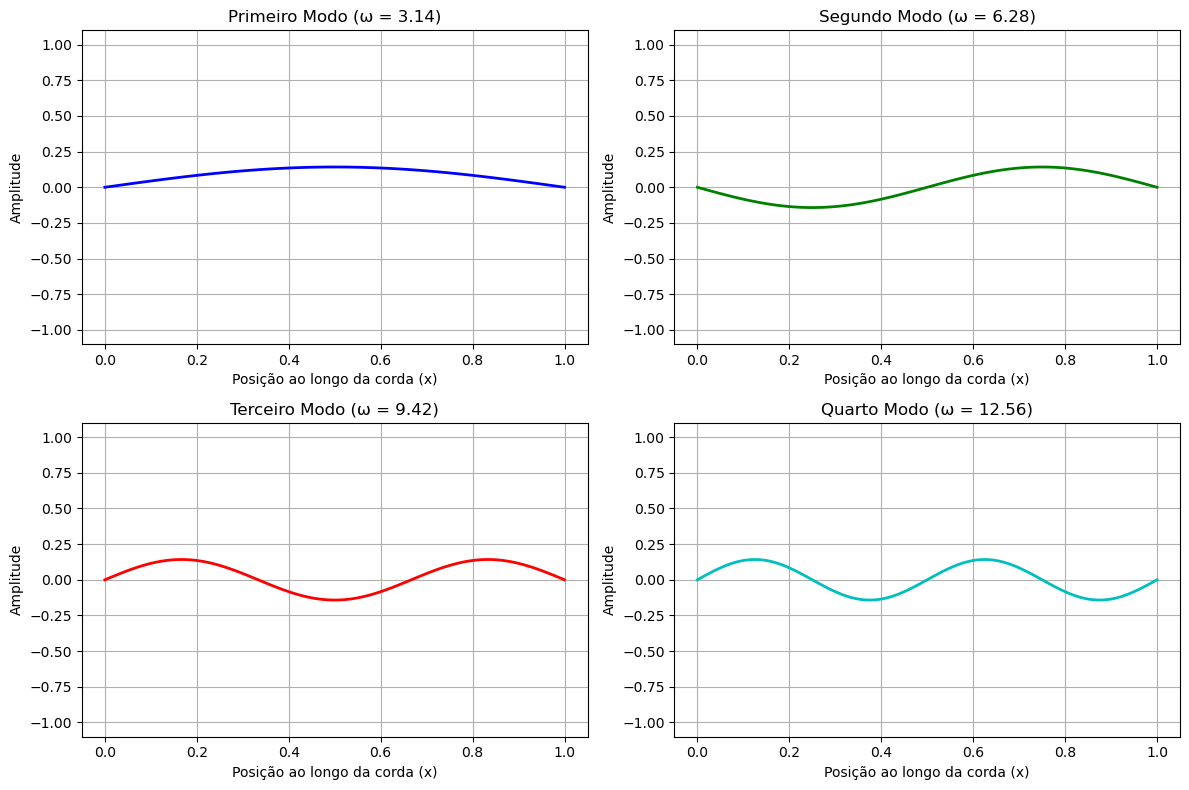

In [5]:
#3d.
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

# Parâmetros físicos
L = 1.0  # Comprimento da corda
c = 1.0  # Velocidade da onda
N = 100  # Número de pontos na discretização

# Função para calcular os modos numéricos
def calculate_modes(L, c, N, num_modes=4):
    """Calcula os primeiros modos de vibração usando diferenças finitas."""
    dx = L / (N - 1)
    x = np.linspace(0, L, N)

    # Construir matriz tridiagonal
    main_diag = -2 * np.ones(N)
    off_diag = np.ones(N - 1)
    A = (np.diag(main_diag) + np.diag(off_diag, 1) + np.diag(off_diag, -1)) / (dx**2)

    # Aplicar condições de contorno (pontos fixos nas extremidades)
    A = A[1:-1, 1:-1]

    # Calcular autovalores e autovetores
    eigenvalues, eigenvectors = eigh(A)

    # Ordenar os modos por frequência crescente
    idx = np.argsort(np.abs(eigenvalues))
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]

    # Adicionar zeros nas extremidades (condições de contorno)
    full_eigenvectors = np.zeros((N, num_modes))
    full_eigenvectors[1:-1, :] = eigenvectors[:, :num_modes]

    # Calcular frequências angulares
    omega = c * np.sqrt(-eigenvalues[:num_modes])

    return x, full_eigenvectors, omega

# Calcular os modos
x, modes, omega = calculate_modes(L, c, N)

# Configurações do gráfico
plt.figure(figsize=(12, 8))
colors = ['b', 'g', 'r', 'c']
titles = ['Primeiro Modo', 'Segundo Modo', 'Terceiro Modo', 'Quarto Modo']

# Plotar cada modo
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.plot(x, modes[:, i], colors[i], linewidth=2)
    plt.title(f'{titles[i]} (ω = {omega[i]:.2f})')
    plt.xlabel('Posição ao longo da corda (x)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.ylim(-1.1, 1.1)  # Mesma escala para todos

plt.tight_layout()
plt.show()